# Predictive Maintenance — Exploratory Data Analysis

## Objective
Analyze industrial IoT sensor data to understand machine behavior, failure patterns, and maintenance needs.

Dataset:
- 24,042 records
- 20 machines
- 4 machine types

Tools: Python, SQL, Power BI, Excel

### Import libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Load dataset

In [2]:
df = pd.read_csv("../../data/raw/predictive_maintenance.csv", parse_dates=["timestamp"])

df.head()

,timestamp,machine_id,machine_type,vibration_rms,temperature_motor,current_phase_avg,pressure_level,rpm,operating_mode,hours_since_maintenance,ambient_temp,rul_hours,failure_within_24h,failure_type,estimated_repair_cost
0,2024-01-01 00:00:00,1,CNC,0.81,49.51,5.10,23.6,860.9,idle,273.80,13.9,61.00,0,none,0
1,2024-01-01 00:03:00,1,CNC,0.75,40.58,5.30,23.6,899.6,idle,273.85,10.2,60.95,0,none,0
2,2024-01-01 00:21:00,1,CNC,0.71,49.70,NaN,21.3,862.7,idle,274.15,13.6,60.65,0,none,0
3,2024-01-01 00:45:00,1,CNC,0.76,43.04,4.79,22.6,870.4,idle,274.55,13.4,60.25,0,none,0
4,2024-01-01 00:54:00,1,CNC,0.88,41.39,4.44,22.2,881.9,idle,274.70,10.8,60.10,0,none,0


### Dataset overview

In [3]:
print("Shape:", df.shape)

print("\nColumns:")
print(df.columns.tolist())

print("\nMachines:", df["machine_id"].nunique())

print("\nMachine types:")
print(df["machine_type"].value_counts())

Shape: (24042, 15)

Columns:
['timestamp', 'machine_id', 'machine_type', 'vibration_rms', 'temperature_motor', 'current_phase_avg', 'pressure_level', 'rpm', 'operating_mode', 'hours_since_maintenance', 'ambient_temp', 'rul_hours', 'failure_within_24h', 'failure_type', 'estimated_repair_cost']

Machines: 20

Machine types:
machine_type
Pump           6114
Robotic Arm    6003
Compressor     5988
CNC            5937
Name: count, dtype: int64


### Data types and missing values

In [4]:
df.info()

missing = df.isnull().sum()

missing_percent = (missing / len(df)) * 100

pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_percent
}).sort_values("missing_percent", ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24042 entries, 0 to 24041
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                24042 non-null  datetime64[ns]
 1   machine_id               24042 non-null  int64         
 2   machine_type             24042 non-null  object        
 3   vibration_rms            23042 non-null  float64       
 4   temperature_motor        23208 non-null  float64       
 5   current_phase_avg        23311 non-null  float64       
 6   pressure_level           23118 non-null  float64       
 7   rpm                      23509 non-null  float64       
 8   operating_mode           24042 non-null  object        
 9   hours_since_maintenance  24042 non-null  float64       
 10  ambient_temp             24042 non-null  float64       
 11  rul_hours                24042 non-null  float64       
 12  failure_within_24h       24042 n

,missing_count,missing_percent
vibration_rms,1000,4.159388
pressure_level,924,3.843274
temperature_motor,834,3.468929
current_phase_avg,731,3.040512
rpm,533,2.216954
timestamp,0,0.000000
machine_type,0,0.000000
machine_id,0,0.000000
operating_mode,0,0.000000
hours_since_maintenance,0,0.000000


### Failure distribution

Failure rate: 0.14807420347724815


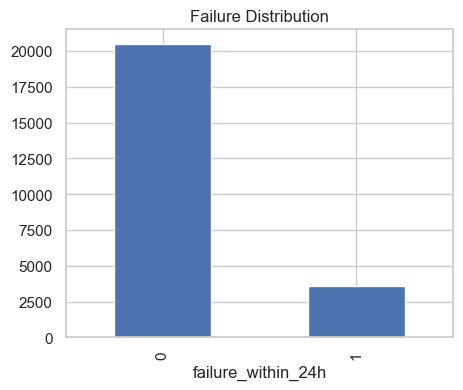

In [15]:
plt.figure(figsize=(5,4))
failure_rate = df["failure_within_24h"].mean()

print("Failure rate:", failure_rate)

df["failure_within_24h"].value_counts().plot(
    kind="bar",
    title="Failure Distribution"
)

plt.show()

### Failure rate by machine

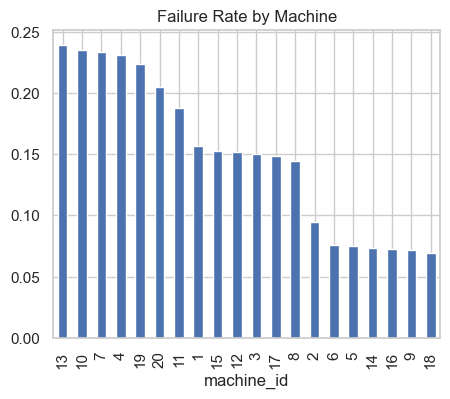

In [16]:
plt.figure(figsize=(5,4))
failure_by_machine = (
    df.groupby("machine_id")["failure_within_24h"]
    .mean()
    .sort_values(ascending=False)
)

failure_by_machine.plot(
    kind="bar",
    title="Failure Rate by Machine"
)

plt.show()

### Failure rate by machine type

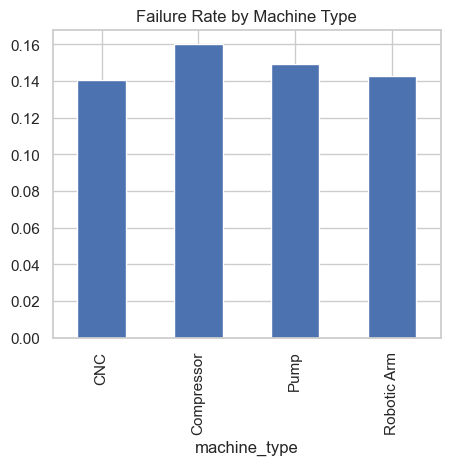

In [17]:
plt.figure(figsize=(5,4))
failure_by_type = (
    df.groupby("machine_type")["failure_within_24h"]
    .mean()
)

failure_by_type.plot(
    kind="bar",
    title="Failure Rate by Machine Type"
)

plt.show()

### Sensor correlation analysis

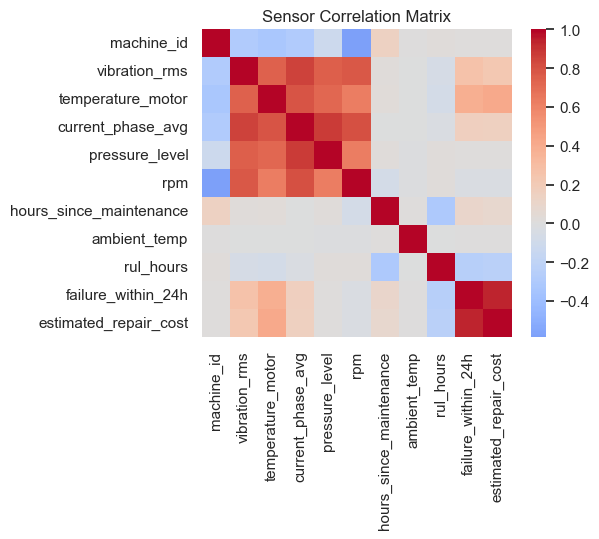

In [19]:
plt.figure(figsize=(5,4))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0
)

plt.title("Sensor Correlation Matrix")

plt.show()

### Vibration vs failure

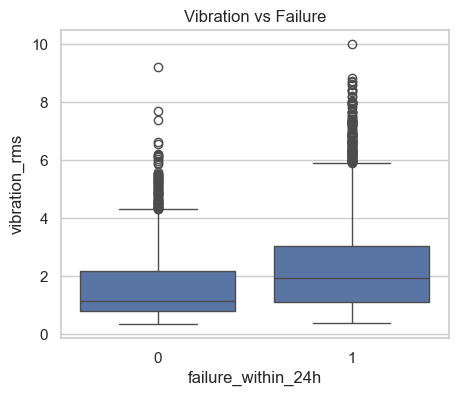

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="failure_within_24h",
    y="vibration_rms",
    data=df
)

plt.title("Vibration vs Failure")

plt.show()

### Temperature vs failure

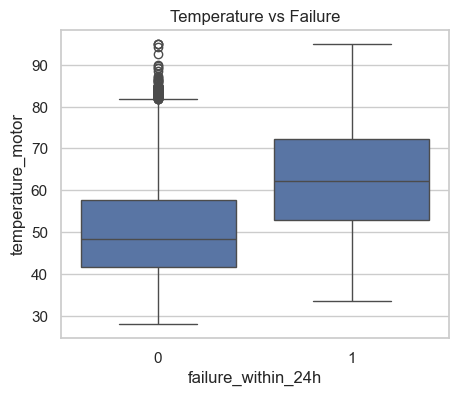

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(
    x="failure_within_24h",
    y="temperature_motor",
    data=df
)

plt.title("Temperature vs Failure")

plt.show()

### Repair cost analysis

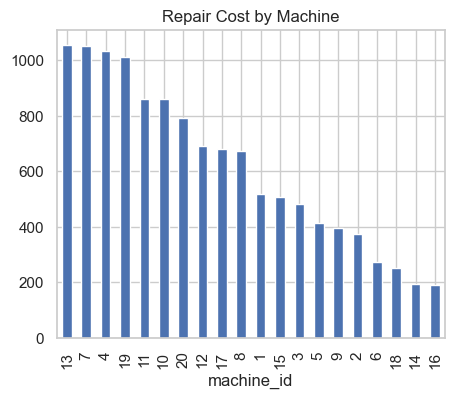

In [24]:
plt.figure(figsize=(5,4))
cost_by_machine = (
    df.groupby("machine_id")["estimated_repair_cost"]
    .mean()
    .sort_values(ascending=False)
)

cost_by_machine.plot(
    kind="bar",
    title="Repair Cost by Machine"
)

plt.show()

### (RUL)-Remaining Useful Life analysis

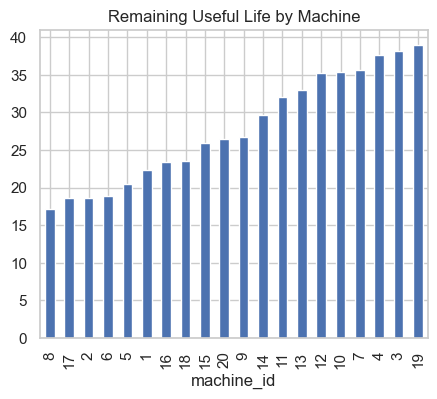

In [27]:
plt.figure(figsize=(5,4))
rul_by_machine = (
    df.groupby("machine_id")["rul_hours"]
    .mean()
    .sort_values()
)

rul_by_machine.plot(
    kind="bar",
    title="Remaining Useful Life by Machine"
)

plt.show()

In [ ]:
# Key Insights

- Machines show varying failure rates
- Vibration strongly correlates with failures
- Temperature is a major failure indicator
- Certain machines incur significantly higher repair costs

# Business Recommendation

Implement preventive maintenance based on vibration and temperature thresholds.